In [1]:
import numpy as np
from matplotlib import pyplot as plt
from py import opt, read
from hypergraph import hypergraph
from py.utils import *
import pathlib
import networkx as nx
from scipy.optimize import root, approx_fprime
from cProfile import run

from scipy.stats import zipf
%matplotlib inline

import sys
sys.version

'3.5.2 (default, Oct  8 2019, 13:06:37) \n[GCC 5.4.0 20160609]'

127 degeneracies removed, 0 remain.


Text(0.5, 1.0, 'Degree Sequence')

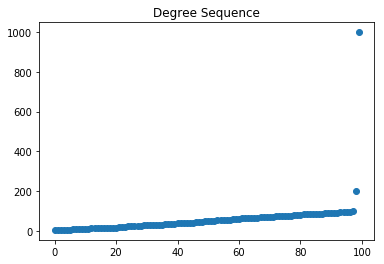

In [2]:
# construct a degree sequence

n = 100  # number of nodes

deg = (np.random.rand(n))**4
deg += np.random.randint(1, n, n)
deg = deg / 2
deg = deg.astype(int) + 1
deg = deg * 2
deg[9:10] = 1000


deg[80] = 200

# use nx.configuration model to make a multigraph, then represent as hypergraph
g = nx.configuration_model(deg)
e = list(g.edges())

G = hypergraph.hypergraph(e)
G.remove_degeneracy()        # remove self-loops
d = G.node_degrees()
d = np.sort(d)
n = len(d)


plt.scatter(np.arange(n), np.sort(d))
plt.title('Degree Sequence')

In [3]:
# use copies of a star graph
k_copies = 10

j_leaves = 100

d = np.repeat(np.concatenate(([j_leaves], np.repeat(1, j_leaves))), k_copies)
n = len(d)

In [4]:
np.random.seed(seed=12345)

# zipf-distributed

n = 200

d1 = zipf.rvs(a = 2, size=n)
d1 = 2*d1
d1 = np.sort(d1)

In [5]:
np.random.seed(seed=12345)

# zipf-distributed

n = 200

d2 = np.random.randint(n/4, size = n) + 1
# d2 = (d2/50) ** 4
d2 = 2*d2
d2 = np.sort(d2)

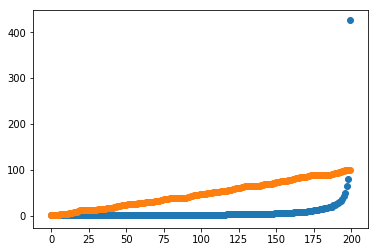

In [6]:
plt.scatter(np.arange(n), d1)
plt.scatter(np.arange(n), d2)

Successfully converged within tolerance 0.01 in 3 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within tolerance 0.01 in 1 steps.
Successfully converged within t

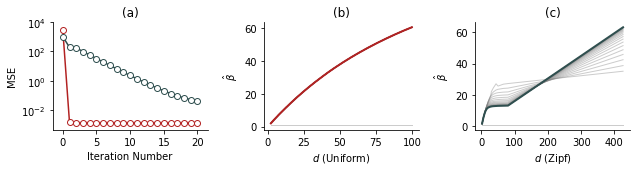

In [7]:
fig = plt.figure(figsize = (9, 2.5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(133)
ax3 = fig.add_subplot(132)



b1 = np.ones(n)

obj = opt.mse(b1, d1)


color = 'grey'
alpha = .4
size = 1

ax2.plot(d1, b1, color = color, linewidth = size, alpha = alpha)

steps = 20
interval = 5

v1 = np.zeros(steps+1)
v2 = np.zeros(steps+1)

v1[0] = obj

for i in range(steps):
    b1, obj = opt.compute_b(d1, alpha = 0.05, 
                           message_every = 100, 
                           b0 = b1, 
                           max_steps = interval, 
                           tol = .01)
    v1[i+1] = obj
    if i == steps - 1:
        color = 'darkslategrey'
        alpha = 1
        size = 2
    
    ax2.plot(d1, b1, color = color, linewidth = size, alpha = alpha)
    
#     ax1.scatter([i], [obj], edgecolor = 'darkslategrey', color = 'white')
    ax1.semilogy()
    
b2 = np.ones(n)


obj = opt.mse(b2, d2)

color = 'grey'
alpha = .4
size = 1

ax3.plot(d2, b2, color = color, linewidth = size, alpha = alpha)

v2[0] = obj

for i in range(steps):
    b2, obj = opt.compute_b(d2, alpha = 0.2, 
                           message_every = 100, 
                           b0 = b2, 
                           max_steps = interval, 
                           tol = .01)
    v2[i+1] = obj
    if i == steps - 1:
        color = 'firebrick'
        alpha = 1
        size = 2
    
    ax3.plot(d2, b2, color = color, linewidth = size, alpha = alpha)
        
        
ax1.plot(np.arange(steps+1), v1, color = 'darkslategrey', zorder = 1)
ax1.scatter(np.arange(steps+1), v1, facecolors = 'white', edgecolors = 'darkslategrey', zorder = 2)
ax1.plot(np.arange(steps+1), v2, color = 'firebrick', zorder = 1)
ax1.scatter(np.arange(steps+1), v2, facecolors = 'white', edgecolors = 'firebrick', zorder = 2)


ax1.set(xlabel = 'Iteration Number',
        ylabel = 'MSE', 
        title = '(a)')

ax2.set(xlabel = r'$d$ (Zipf)',
        ylabel = r'$\hat{\beta}$',
        title = '(c)')

ax3.set(xlabel = r'$d$ (Uniform)',
        ylabel = r'$\hat{\beta}$',
        title = '(b)')

for ax in [ax1, ax2, ax3]:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

plt.tight_layout()

plt.savefig('fig/convergence.png', dpi = 300)

370.2212965727941
562.4387503514677
561.3022180988338
13.908207606674647
198.83249385385716
1.0480667192045e-19
1.0480667192045e-19 -- infeasible
1.1873907050890562e-21
1.1873907050890562e-21 -- infeasible
162.98414676257966
397.59016561960146
999.0725985607183
159.09390958774367
584.5452864827089
8.810036552600617e-16
8.810036552600617e-16 -- infeasible
0.2809283619254668
4.276426022125482e-17
4.276426022125482e-17 -- infeasible
699.5149547229468
111.82747553417798
2.1679816628646706e-17
2.1679816628646706e-17 -- infeasible
3.2131944970550707e-14
3.2131944970550707e-14 -- infeasible
770.3705086709988


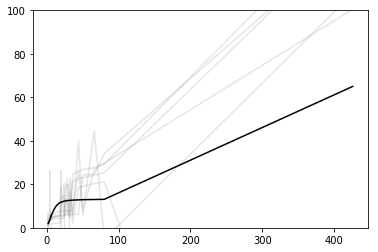

In [9]:
n_feasible = 0

for i in range(20):
    b_ = root(lambda b: opt.degree_estimate(b) - d1, x0 = np.random.rand(n))['x']

    obj = opt.mse(b_, d1)
    print(obj)
    if obj < 0.01:
        if opt.check_feasible(b_):
            color = 'black'
            alpha = 1
            n_feasible += 1
            print(str(obj) + str(' -- feasible'))
        else:
            color = 'grey'
            alpha = .2
            print(str(obj) + str(' -- infeasible'))
        plt.plot(d1, b_, color = color, alpha = alpha)
plt.gca().set(ylim = (0, 100))
    
b_ = root(lambda b: opt.degree_estimate(b) - d1, x0 = b1)['x']
plt.plot(d1, b_, color = 'black', alpha = 1)

/home/pchodrow/bayes_modularity/venv/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


[(-1, 15), (0.5, 1.5)]

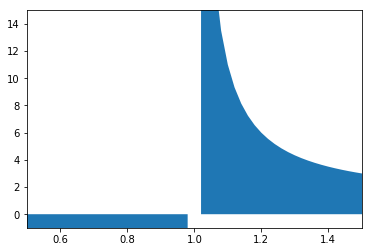

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0,2, 101)
y = x / (x-1)

# plt.plot(x,y)
# plt.plot(x, np.zeros_like(x))
ax.fill_between(x, y, np.zeros_like(x))
ax.set(xlim = (.5,1.5),
       ylim = (-1, 15))

In [12]:
def star_graph_sequence(k_copies = 1, j_leaves = 2):

    d = np.repeat(np.concatenate(([j_leaves], np.repeat(1, j_leaves))), k_copies)
    return(d)

In [21]:
# b_ = root(lambda b: opt.degree_estimate(b) - d, x0 = np.random.rand(n))['x']

M = np.zeros((5,5))

for i in range(1, 6):
    for j in range(1, 6):
        d = star_graph_sequence(i+1, j)
        n = len(d)

#         b_, obj = opt.compute_b(d, message_every = 10000, alpha = .001, max_steps = 10**3)
        b_ = -1
        obj = 2
        while np.min(b_) < .5:
            b_ = root(lambda b: opt.degree_estimate(b) - d, x0 = np.ones(n))['x']
            obj = opt.mse(b_, d)
        M[i-1,j-1] = np.min(b_)
#         M[i-1,j-1] = obj

([<matplotlib.axis.YTick at 0x7fb39b086940>,
 <a list of 5 Text yticklabel objects>)

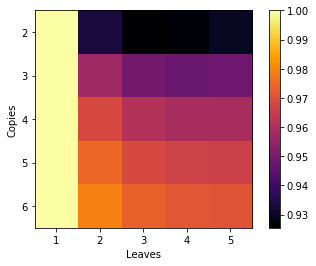

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(M, cmap = 'inferno')
plt.colorbar(im)

ax.set(xlabel = 'Leaves', ylabel = 'Copies')

plt.xticks(np.arange(5), 1 + np.arange(5))
plt.yticks(np.arange(5), 2 + np.arange(5))

In [26]:
d = star_graph_sequence(1, 1)
n = len(d)
# b_, obj = opt.compute_b(d, 
#                         message_every = 10000, 
#                         alpha = .001, 
#                         max_steps = 10**3, 
#                         feasible_value = 0)

b_ = root(lambda b: opt.degree_estimate(b) - d, x0 = np.ones(n))['x']
